In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("C:\\Users\\ROG STRIX\\Desktop\\DataSets and  Projects\\Practicedatasets\\flight price\\Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.shape

(300153, 12)

In [6]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df=df.drop(['Unnamed: 0','flight'],axis=1)

Text(0.5, 1.0, 'Correlation')

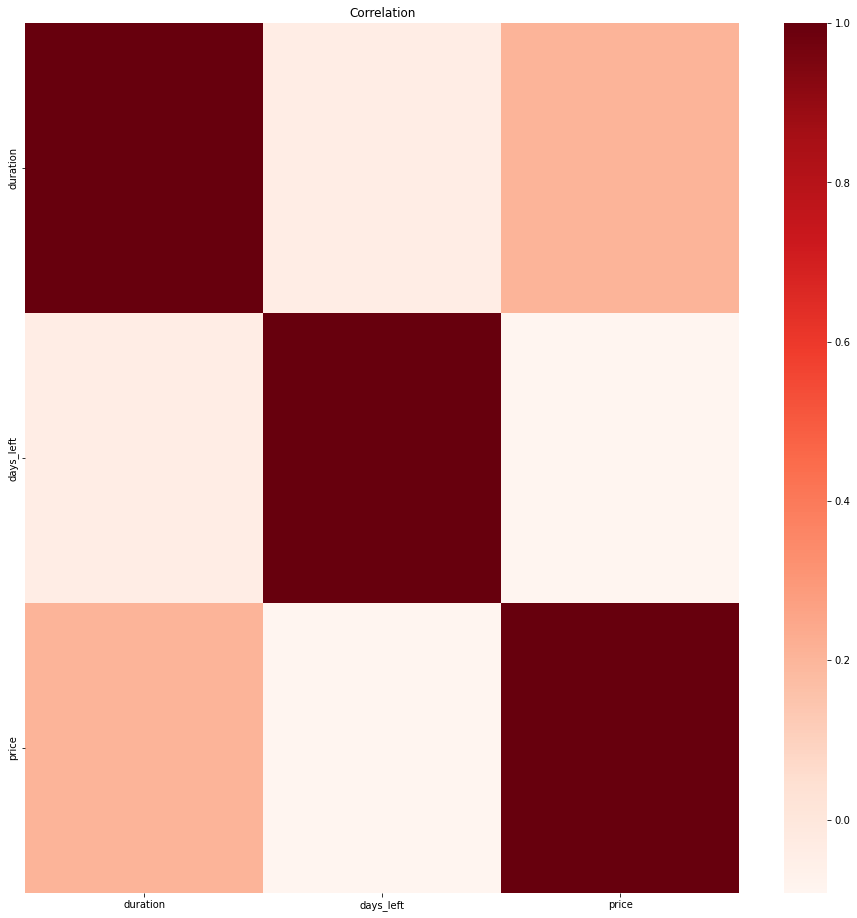

In [9]:
corr=df.corr()
fig=plt.figure(figsize=(16,16))
r=sns.heatmap(corr,cmap='Reds')
r.set_title("Correlation")

In [10]:
corr.sort_values(by=["price"],ascending=False)

,duration,days_left,price
price,0.204222,-0.091949,1.000000
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949


In [11]:
corr.sort_values(by=["price"],ascending=False).iloc[0].sort_values(ascending=False)

price        1.000000
duration     0.204222
days_left   -0.091949
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

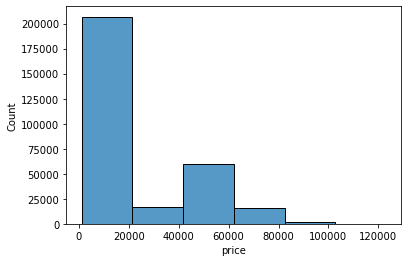

In [12]:
sns.histplot(df['price'],bins=6)

<AxesSubplot:xlabel='airline', ylabel='Count'>

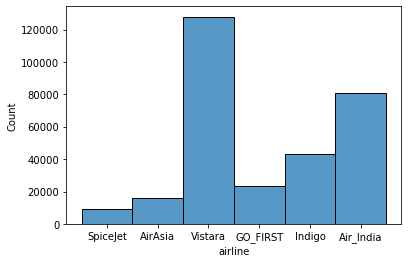

In [13]:
sns.histplot(df['airline'])

<function matplotlib.pyplot.show(close=None, block=None)>

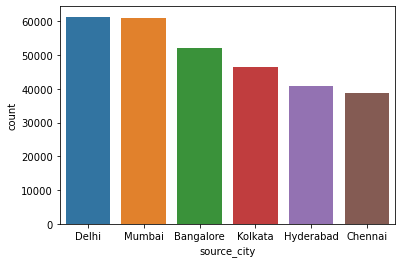

In [14]:
sns.countplot(df['source_city'])
plt.show

<AxesSubplot:xlabel='destination_city', ylabel='count'>

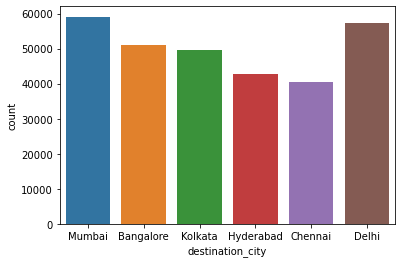

In [15]:
sns.countplot(df['destination_city'])

<AxesSubplot:xlabel='class', ylabel='count'>

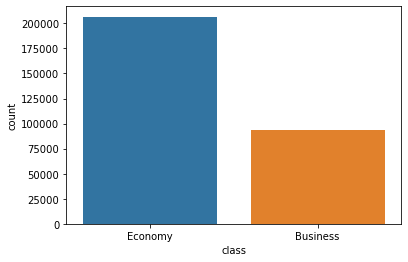

In [16]:
sns.countplot(df['class'])

<AxesSubplot:>

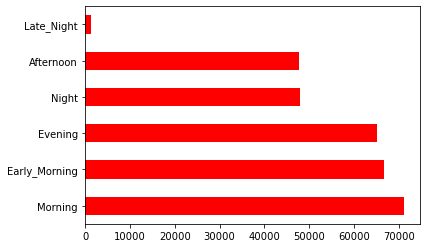

In [17]:
df['departure_time'].value_counts().plot(kind='barh',color = 'red')

<AxesSubplot:xlabel='price', ylabel='airline'>

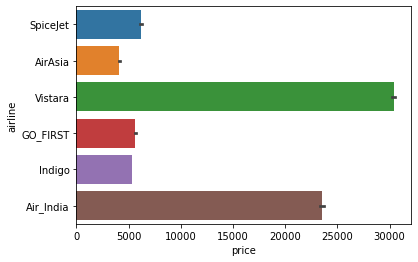

In [18]:
sns.barplot(df['price'],df['airline'])

<AxesSubplot:xlabel='price', ylabel='source_city'>

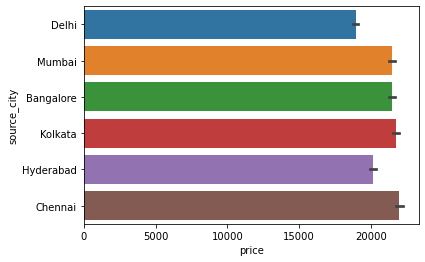

In [21]:
sns.barplot(df['price'],df['source_city'])


<AxesSubplot:xlabel='price', ylabel='class'>

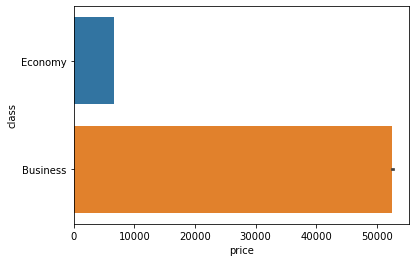

In [22]:
sns.barplot(df['price'],df['class'])


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['airline'] = encoder.fit_transform(df['airline'])
df['source_city'] = encoder.fit_transform(df['source_city'])
df['departure_time'] = encoder.fit_transform(df['departure_time'])
df['stops'] = encoder.fit_transform(df['stops'])
df['arrival_time'] = encoder.fit_transform(df['arrival_time'])
df['destination_city'] = encoder.fit_transform(df['destination_city'])
df['class'] = encoder.fit_transform(df['class'])

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'],axis=1), 
                                                    df['price'], test_size=0.20, 
                                                    random_state=3)

In [29]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

90.47579280446618 %


In [38]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


In [34]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [36]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
score = xgbr.score(x_train, y_train)  
print("Training score: ", score)

Training score:  0.9769313308401529


In [40]:
scores = cross_val_score(xgbr, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98
